### MLP2: Data Preprocessing and Exploratory Analysis 


#### Write your name

- xiaomei Xie
- Lili Hao


#### Overview:  This dataset is all about flights in the united states, including information about the number, length, and type of delays. The data is reported for individual months at every major airport for every carrier.


### (a) Datasets (10 pts)

In [1]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import os
datapath = os.path.join("../rawdata","")  
datapath

'../rawdata\\'

#### Load the data into a DataFrame

In [3]:

# Load the data
df = pd.read_csv(datapath + "airlines.csv", thousands=',')
df.shape

(4408, 24)

In [4]:
df.head(5)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [5]:
df.tail(5)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116
4407,TPA,"Tampa, FL: Tampa International",2016/01,1,January,2016,410,342,312,2,...,1095,7,4748,5996,22557,21164,11423,37,57774,2593


In [6]:
columns = df.columns
columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

In [8]:
df.describe()

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


### (b) Data preprocessing (10 pts) 

##### rename columns for easier query 

In [9]:
df.rename(columns = {'Statistics.# of Delays.Carrier':'# of Delays.Carrier',
                      'Statistics.# of Delays.Late Aircraft':'# of Delays.Late Aircraft',
                      'Statistics.# of Delays.National Aviation System':'# of Delays.National Aviation System',
                      'Statistics.# of Delays.Security':'# of Delays.Security',
                      'Statistics.# of Delays.Weather':'# of Delays.Weather',
                      'Statistics.Carriers.Total':'Carriers.Total',
                      'Statistics.Flights.Cancelled':'Flights.Cancelled',
                      'Statistics.Flights.Delayed':'Flights.Delayed',
                      'Statistics.Flights.Diverted':'Flights.Diverted',
                      'Statistics.Flights.On Time':'Flights.On Time',
                       'Statistics.Flights.Total':'Flights.Total',
                      'Statistics.Minutes Delayed.Carrier':'Minutes Delayed.Carrier',
                      'Statistics.Minutes Delayed.Late Aircraft':'Minutes Delayed.Late Aircraft',
                       'Statistics.Minutes Delayed.National Aviation System': 'Minutes Delayed.National Aviation System',
                      'Statistics.Minutes Delayed.Security':'Minutes Delayed.Security',
                      'Statistics.Minutes Delayed.Total':'Minutes Delayed.Total',
                       'Statistics.Minutes Delayed.Weather': 'Minutes Delayed.Weather'
                    }, inplace = True) 

In [10]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather'],
      dtype='object')

In [11]:
df.isnull().sum()

Airport.Code                                0
Airport.Name                                0
Time.Label                                  0
Time.Month                                  0
Time.Month Name                             0
Time.Year                                   0
# of Delays.Carrier                         0
# of Delays.Late Aircraft                   0
# of Delays.National Aviation System        0
# of Delays.Security                        0
# of Delays.Weather                         0
Statistics.Carriers.Names                   0
Carriers.Total                              0
Flights.Cancelled                           0
Flights.Delayed                             0
Flights.Diverted                            0
Flights.On Time                             0
Flights.Total                               0
Minutes Delayed.Carrier                     0
Minutes Delayed.Late Aircraft               0
Minutes Delayed.National Aviation System    0
Minutes Delayed.Security          

In [12]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter



<AxesSubplot:title={'center':'Minutes Delayed.Carrier'}, xlabel='Time.Year'>

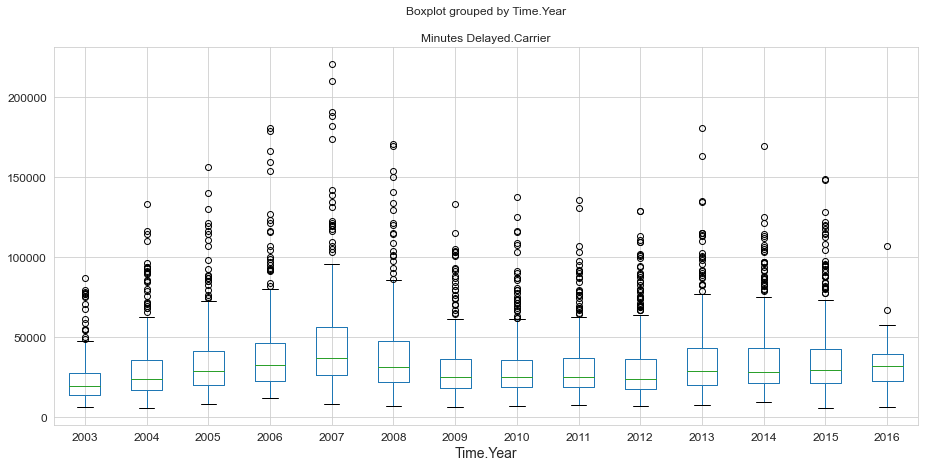

In [13]:
df.boxplot(column='Minutes Delayed.Carrier', by='Time.Year', figsize=(15,7))


<AxesSubplot:>

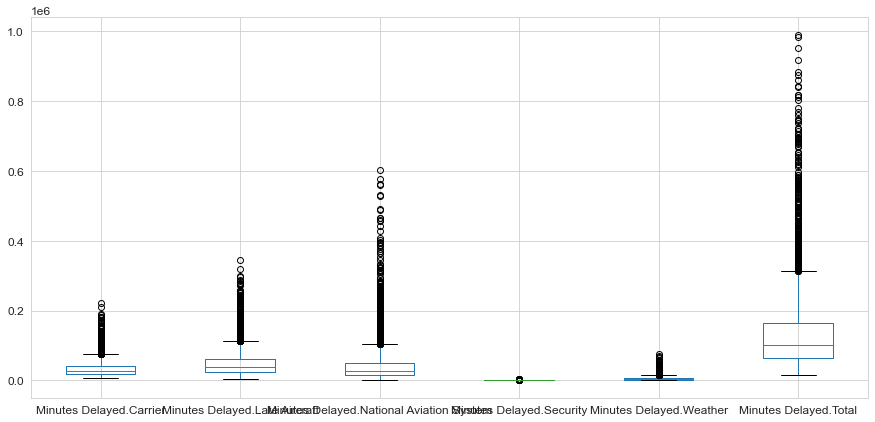

In [14]:
df.boxplot(column=['Minutes Delayed.Carrier',
                   'Minutes Delayed.Late Aircraft',
                   'Minutes Delayed.National Aviation System',
                   'Minutes Delayed.Security',
                   'Minutes Delayed.Weather',
                   'Minutes Delayed.Total'], figsize=(15,7))

In [15]:
from scipy import stats

carrier = df[(np.abs(stats.zscore(df['# of Delays.Carrier'])) < 3)]
carrier.shape

(4341, 24)

<AxesSubplot:>

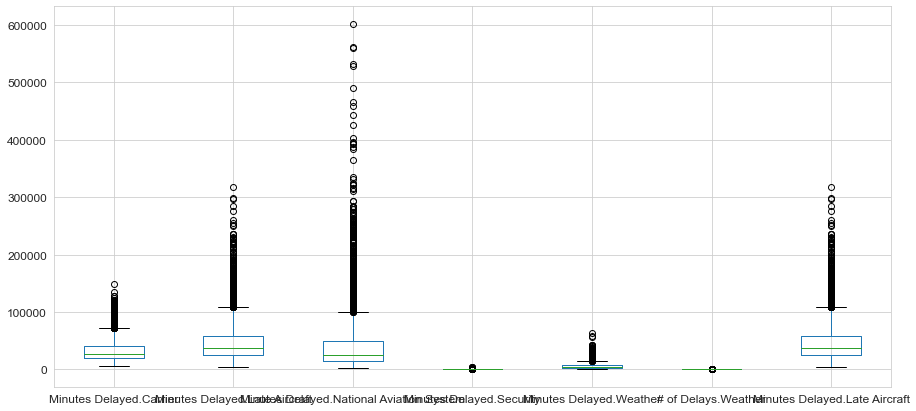

In [16]:
carrier.boxplot(column=['Minutes Delayed.Carrier',
                        'Minutes Delayed.Late Aircraft',
                        'Minutes Delayed.National Aviation System',
                        'Minutes Delayed.Security',
                        'Minutes Delayed.Weather',
                        '# of Delays.Weather',
                        'Minutes Delayed.Late Aircraft'], figsize=(15,7))

In [17]:
carrier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4341 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Airport.Code                              4341 non-null   object
 1   Airport.Name                              4341 non-null   object
 2   Time.Label                                4341 non-null   object
 3   Time.Month                                4341 non-null   int64 
 4   Time.Month Name                           4341 non-null   object
 5   Time.Year                                 4341 non-null   int64 
 6   # of Delays.Carrier                       4341 non-null   int64 
 7   # of Delays.Late Aircraft                 4341 non-null   int64 
 8   # of Delays.National Aviation System      4341 non-null   int64 
 9   # of Delays.Security                      4341 non-null   int64 
 10  # of Delays.Weather                       4341 n

array([[<AxesSubplot:title={'center':'2003'}>,
        <AxesSubplot:title={'center':'2004'}>,
        <AxesSubplot:title={'center':'2005'}>,
        <AxesSubplot:title={'center':'2006'}>],
       [<AxesSubplot:title={'center':'2007'}>,
        <AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2009'}>,
        <AxesSubplot:title={'center':'2010'}>],
       [<AxesSubplot:title={'center':'2011'}>,
        <AxesSubplot:title={'center':'2012'}>,
        <AxesSubplot:title={'center':'2013'}>,
        <AxesSubplot:title={'center':'2014'}>],
       [<AxesSubplot:title={'center':'2015'}>,
        <AxesSubplot:title={'center':'2016'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

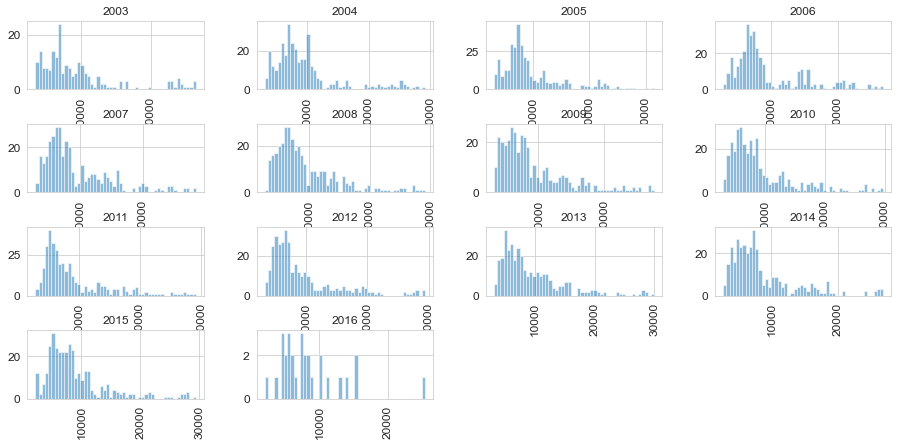

In [18]:
df.hist(column='Flights.On Time', by='Time.Year', bins=50,  alpha=0.5, figsize=(15,7))

### Classify and Set attribute for the dataset

In [19]:
df['Rate'] = (df['Flights.Delayed'] / df['Flights.Total'])
df.head(10)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,27,23974,30060,61606,68335,118831,518,268764,19474,0.194378
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,3,7875,9639,20319,28189,24400,99,77167,4160,0.168378
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,15,6998,8287,13635,26810,17556,278,64480,6201,0.150235
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,14,7021,8670,14763,23379,23804,127,65865,3792,0.180161
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,18,5321,6513,13775,13712,20999,120,52747,4141,0.168893
5,DEN,"Denver, CO: Denver International",2003/06,6,June,2003,516,323,664,11,...,22,10024,11691,26634,18969,23538,706,75428,5581,0.137798
6,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2003/06,6,June,2003,986,1390,2147,19,...,133,22303,27628,70918,80714,90574,683,263521,20632,0.173664
7,DTW,"Detroit, MI: Detroit Metro Wayne County",2003/06,6,June,2003,376,371,570,6,...,9,10227,11754,21802,18715,16482,139,60667,3529,0.118683
8,EWR,"Newark, NJ: Newark Liberty International",2003/06,6,June,2003,322,519,1948,10,...,42,9441,12506,20190,30905,91048,490,150513,7880,0.233568
9,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",2003/06,6,June,2003,247,256,427,5,...,10,3672,4662,12547,14600,14935,141,44303,2080,0.207422


In [20]:
mean = df.Rate.mean()
mean


0.20013685155269878

In [21]:
df = df.assign(Ratio_Rank = lambda x: x['Rate']>mean)
df.head(10)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,23974,30060,61606,68335,118831,518,268764,19474,0.194378,False
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,7875,9639,20319,28189,24400,99,77167,4160,0.168378,False
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,6998,8287,13635,26810,17556,278,64480,6201,0.150235,False
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,7021,8670,14763,23379,23804,127,65865,3792,0.180161,False
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,5321,6513,13775,13712,20999,120,52747,4141,0.168893,False
5,DEN,"Denver, CO: Denver International",2003/06,6,June,2003,516,323,664,11,...,10024,11691,26634,18969,23538,706,75428,5581,0.137798,False
6,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2003/06,6,June,2003,986,1390,2147,19,...,22303,27628,70918,80714,90574,683,263521,20632,0.173664,False
7,DTW,"Detroit, MI: Detroit Metro Wayne County",2003/06,6,June,2003,376,371,570,6,...,10227,11754,21802,18715,16482,139,60667,3529,0.118683,False
8,EWR,"Newark, NJ: Newark Liberty International",2003/06,6,June,2003,322,519,1948,10,...,9441,12506,20190,30905,91048,490,150513,7880,0.233568,True
9,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",2003/06,6,June,2003,247,256,427,5,...,3672,4662,12547,14600,14935,141,44303,2080,0.207422,True


### (c) Exploratory data analysis (20 pts) 

In [22]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 

In [23]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [24]:
df.corr()

,Time.Month,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Carriers.Total,Flights.Cancelled,Flights.Delayed,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
Time.Month,1.000000,-0.075977,-0.008749,-0.021178,-0.010177,0.044398,-0.063141,0.009466,-0.132985,-0.016750,...,0.024357,0.009119,-0.019420,-0.027362,-0.008659,0.043901,-0.021451,-0.065504,-0.057584,-0.054722
Time.Year,-0.075977,1.000000,-0.067204,0.000373,-0.195279,-0.315334,-0.191346,-0.483083,-0.046951,-0.127542,...,-0.052625,-0.074740,0.028561,0.026476,-0.150661,-0.249772,-0.069273,-0.134033,-0.138565,-0.114675
# of Delays.Carrier,-0.008749,-0.067204,1.000000,0.872725,0.648211,0.407397,0.729619,0.333489,0.518305,0.861985,...,0.758744,0.829259,0.952155,0.836543,0.532933,0.380787,0.798300,0.708586,0.322454,0.286063
# of Delays.Late Aircraft,-0.021178,0.000373,0.872725,1.000000,0.703330,0.312898,0.684675,0.268856,0.608284,0.906646,...,0.741917,0.831632,0.894121,0.979729,0.626905,0.297629,0.881326,0.697966,0.370247,0.310253
# of Delays.National Aviation System,-0.010177,-0.195279,0.648211,0.703330,1.000000,0.216732,0.731453,0.263649,0.655539,0.927546,...,0.590919,0.721083,0.691461,0.730317,0.956954,0.243707,0.920091,0.698585,0.543915,0.394428
# of Delays.Security,0.044398,-0.315334,0.407397,0.312898,0.216732,1.000000,0.278034,0.235272,0.117530,0.313698,...,0.258856,0.285214,0.297827,0.263751,0.148077,0.868281,0.244291,0.249887,0.171717,0.151651
# of Delays.Weather,-0.063141,-0.191346,0.729619,0.684675,0.731453,0.278034,1.000000,0.234537,0.586373,0.804410,...,0.556228,0.660898,0.755613,0.697096,0.659647,0.280510,0.787211,0.962323,0.448343,0.355282
Carriers.Total,0.009466,-0.483083,0.333489,0.268856,0.263649,0.235272,0.234537,1.000000,0.160970,0.305701,...,0.280551,0.301617,0.250009,0.223946,0.198423,0.203467,0.241707,0.200550,0.157137,0.121233
Flights.Cancelled,-0.132985,-0.046951,0.518305,0.608284,0.655539,0.117530,0.586373,0.160970,1.000000,0.678981,...,0.413247,0.535110,0.591412,0.656723,0.675313,0.138741,0.726973,0.626871,0.365201,0.276560
Flights.Delayed,-0.016750,-0.127542,0.861985,0.906646,0.927546,0.313698,0.804410,0.305701,0.678981,1.000000,...,0.733519,0.851394,0.883851,0.907936,0.853660,0.317777,0.974404,0.785264,0.497103,0.385688


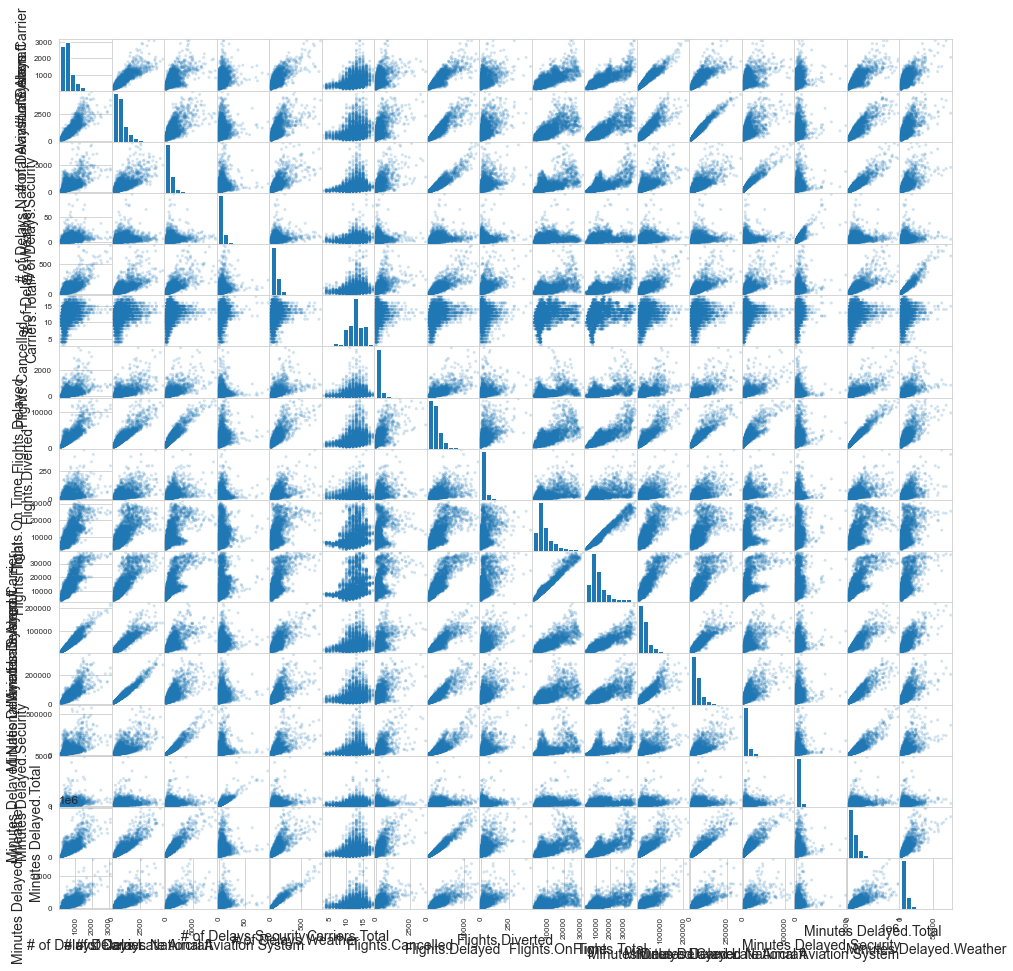

In [25]:
# scatter matrix plot
scatter_matrix(df[col],alpha=0.2,figsize=(16,16))
plt.show() 

In [26]:
# import required libraries 
import pandas as pd 
import seaborn as sb 

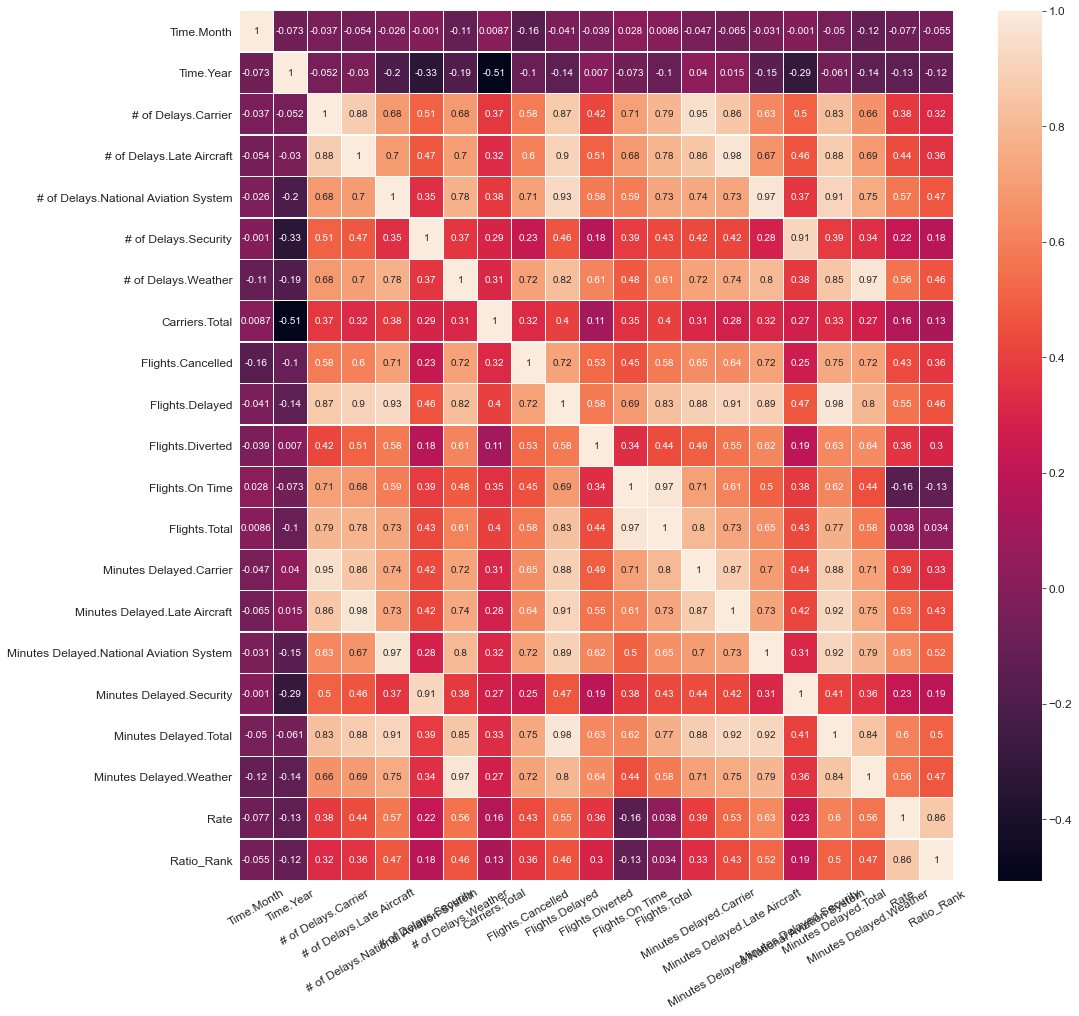

In [27]:
fig, ax = plt.subplots(figsize=(16,16))
sb.heatmap(df.corr(method = 'spearman'),annot=True, linewidths=0.4,annot_kws={'size':10},ax=ax,cbar=True)
plt.xticks(rotation=30)
plt.show()